In [1]:
# importing libraries. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the dataset 
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


# Let us first understand these columns meaning. 
1. GRE score - how much the student has scored in GRE test out of 340. 
2. TOEFL score - how much the student has scored in TOEFL test out of 120. 
3. University rating - the university rating they are applying to. 
4. SOP - Statement of purpose strength out of 5. 
5. LOR - Letter of Recommendation strength out of 5. 
6. CGPA - undergraduate CGPA out of 10. 
7. Research - whether the student have any research experience (either 0 or 1)
8. Chance of Admit - probability of getting in range 0 to 1. 

In [4]:
# the serial no column is unnecessary. So,let's drop that. 
df = df.drop('Serial No.', axis=1)

In [5]:
# Basic overview of dataset. 
print(f"No of rows : {df.shape[0]}, No of columns : {df.shape[1]}")
print(f"Basic information of the df :\n{df.info()}")
print(f"Descriptive statistics of the numerical columns :\n{df.describe()}")
print(f"No of Null values : {df.isnull().sum()}")
print(f"No. of Duplicates : {df.duplicated().sum()}")

No of rows : 500, No of columns : 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
Basic information of the df :
None
Descriptive statistics of the numerical columns :
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.29514

In [6]:
# Our data is all numerical - in a format which our ml model accepts. 
# Our data does not have any null values or niether duplicates to deal with. 
# But from the topic itself we understand that our model have a linear data, by 
# that i mean, if our teofl score or our lor strength, our cgpa , the greater it is, 
# the acceptance chance is more. Isnt this explains that our data is 
# quite simple and linear. 

In [7]:
# Let's now split our data : 
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [8]:
# We will now use PCA to understand the data and correlation. 
# The prerequisite for PCA is to scale your data. 
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [9]:
# Now let's apply PCA. 
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X_scaled)

In [10]:
pca_x_df = pd.DataFrame(pca_x, columns=['PC1', 'PC2'])

In [11]:
pca_x_df

,PC1,PC2
0,-3.568375,-0.328318
1,-1.639199,0.034550
2,0.550991,-0.720794
3,-0.345470,-1.280237
4,2.035804,0.039366
...,...,...
495,-2.438060,-0.020361
496,-4.373303,0.306942
497,-3.910724,0.256798
498,-0.245327,2.135250


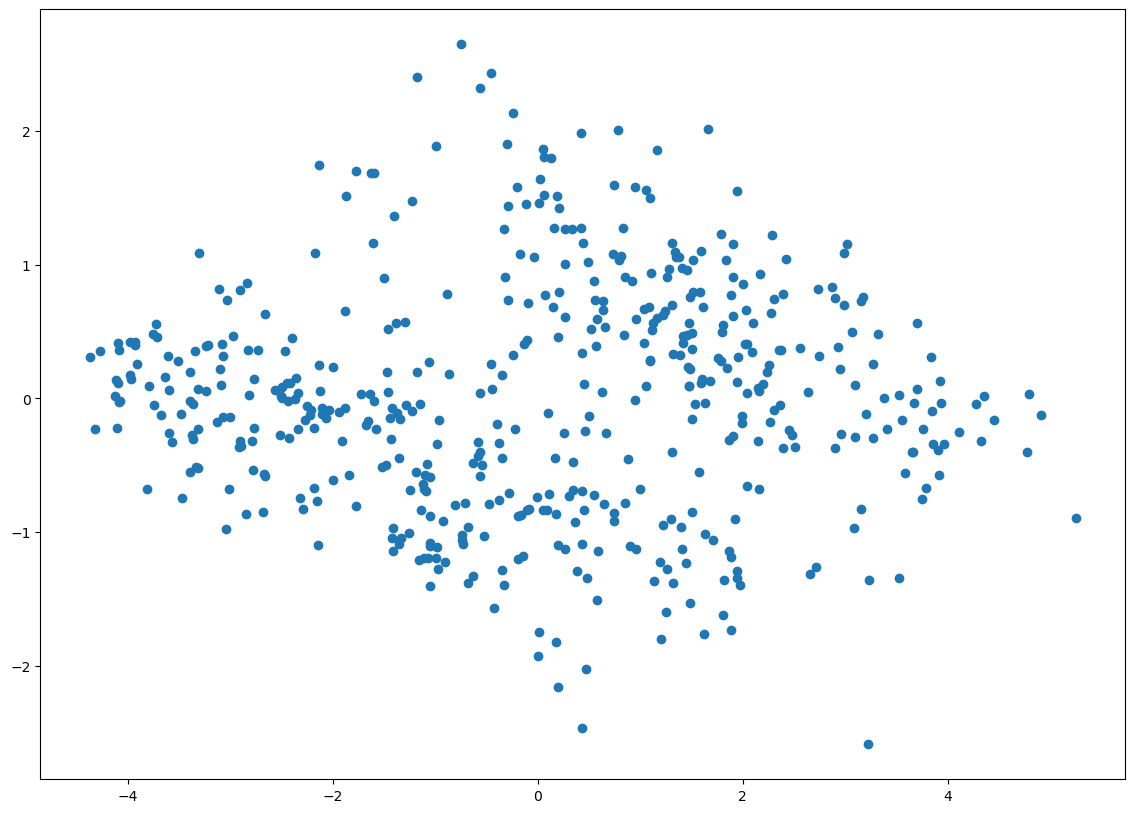

In [12]:
plt.figure(figsize=(14,10))
plt.scatter(pca_x_df['PC1'],pca_x_df['PC2'])

In [13]:
# Let's check : 
pca_max = np.argmax(pca_x_df['PC1'])
pca_min = np.argmin(pca_x_df['PC2'])
print(pca_max)
print(pca_min)

347
273


In [14]:
X.iloc[pca_max,:]

GRE Score            299.00
TOEFL Score           94.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   7.34
Research               0.00
Name: 347, dtype: float64

In [15]:
X.iloc[pca_min, :]

GRE Score            312.00
TOEFL Score           99.00
University Rating      1.00
SOP                    1.00
LOR                    1.50
CGPA                   8.01
Research               1.00
Name: 273, dtype: float64

In [16]:
# Here is the very strong corellation in predicting the acceptance : 
# The less the PC1 value, the more chances of acceptance. 
# and vice versa. 
# This is how, the pca reduces dimensionality and creates new features without affecting 
# the actual relation and variance. 

In [17]:
# Now let us spli the data 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Let's see how well our model performed? 
model.score(X_test, y_test)

0.825630603991949

In [20]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Actual values')

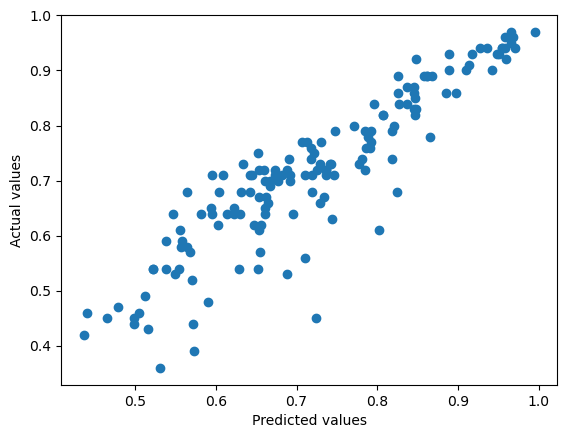

In [21]:
#plotting:
plt.plot(predictions, y_test, 'o')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')